# Muon Observation Data Analysis
# By Max Fine for PHYC11 in 2022
Using "Muon Physics"

In [62]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [63]:
# importing data from file
f_name = "run2.data" #change to data file name, expects it to be in  'data/f_name'

path = "data/" +f_name
raw_data = np.genfromtxt(path,delimiter=' ') # first index is row #, 2nd is col #

In [64]:
# data processing
decay_data = raw_data[:,0]

# values of >40000 indicate that a muon did not decay so we remove them
index_proc = np.where(decay_data <40000)
proc_data = decay_data[index_proc]

In [65]:
data_len = len(proc_data)
mean_lifetime = np.mean(proc_data) # no noise reduction!

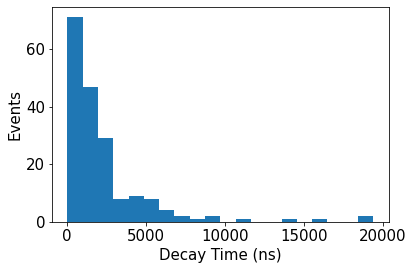

In [66]:
#displaying raw data
n_bins = 2* int(len(proc_data)**(1/3))
n_bins = 20
plt.hist(proc_data,n_bins)#bins=int(len(proc_data)**0.5))
#plt.title('Muon Decay Time Histogram')
plt.xlabel('Decay Time (ns)')#($\mu$s)')
plt.ylabel('Events')
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.savefig('plots/Raw_Muon_Decay_Time_Histogram.pdf')


In [67]:
# finding half life/ time const

def model(t, tou, A, N):
    return A *np.exp((-1*t/tou)) + N # A is not the same as n_0, N is noise 



bins = np.linspace(0, np.max(proc_data),n_bins +1)
data_entries_1, bins_1 = np.histogram(proc_data, bins=bins,)# density=True)
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
guess = np.array([np.mean(proc_data), data_entries_1[0], data_entries_1[-1]])
popt, pcov = curve_fit(model, xdata=binscenters, ydata=data_entries_1, p0=guess)#p0=[20000, 2.0, 2000, 3.0, 0.3])




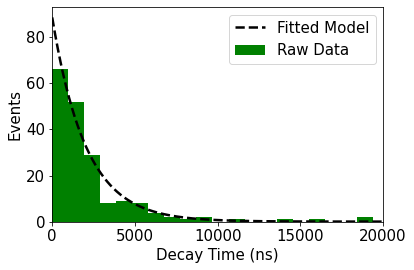

In [68]:
# plotting fitted model
plt.bar(binscenters, data_entries_1, width=bins[1] - bins[0], color ='green', label=r'Raw Data')
xspace = np.linspace(0,20000,100000)
plt.plot(xspace, model(xspace, *popt), '--',color='black',linewidth=2.5 ,label=r'Fitted Model')
#plt.plot(xspace, model(xspace, ), '--',color='black',linewidth=2.5 ,label=r'Fitted Model')
plt.xlim(0,20000)
plt.xlabel(r'Decay Time (ns)')#($\mu$s)')
plt.ylabel(r'Events')
plt.legend(loc='best')
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.savefig('plots/fitted_Muon_Decay_Time_Histogram.pdf')

In [69]:
print('popt ' + str(popt))
half_life = popt[0] # mew s
print('estimated lifetime is ' + str(half_life))
print('mean life time of data is ' + str(np.mean(proc_data)))
print('Data std = '+ str(np.std(proc_data)))


popt [2.04000371e+03 8.84359975e+01 7.85601796e-02]
estimated lifetime is 2040.0037092690975
mean life time of data is 2325.1612903225805
Data std = 2927.633861627658


In [70]:
pcov

array([[ 3.32546925e+04, -5.84994814e+02, -9.20362107e+01],
       [-5.84994814e+02,  2.37267834e+01,  2.18096133e-01],
       [-9.20362107e+01,  2.18096133e-01,  9.35939184e-01]])